##Generate Plots for DRC Paper###

In [12]:
import numpy as np
import pandas as pd
import math
import numpy.random as rand
import scipy
import matplotlib.pyplot as plt
import corner
from scipy.stats import norm
from ipywidgets import FloatProgress
from IPython.display import display
import sys
import pickle
%matplotlib inline
import seaborn
seaborn.set_style('ticks')
seaborn.set_color_codes()

###Load in chain files###

In [18]:
#loc_subset = ['KINSHASA','EQUATEUR','MANIEMA','ORIENTALE','BANDUNDU', 'BAS-CONGO', 'KASAI-OCCIDENTAL', 'KASAI-ORIENTAL',
#           'KASAI-ORIENTAL', 'NORD-KIVU', 'SUD-KIVU' ] #Which locations?
loc_subset = ['KINSHASA','KATANGA']

alldata = []
vaxcase = []
vaxsero = []
burnin = 4000 #Number of burnin samples
nkeep = 500 #Number of samples to use for calculations

#This is the file structure I've been using. Will need to be changed to reflect whatever the local machine uses.
for loc in loc_subset:
    i = 0
    print loc
    for line in open('chains/'+loc+'/alldata/chain_1.txt','r'):
        sample = line.split()
        if (i> burnin ) and i<(burnin+nkeep):
            alldata.append(sample)
        i += 1
    i=0
    for line in open('chains/'+loc+'/vaxcase/chain_1.txt','r'):
        sample = line.split()
        if (i> burnin) and (i<burnin+nkeep):
            vaxcase.append(sample)
        i += 1
    i=0
    for line in open('chains/'+loc+'/vaxsero/chain_1.txt','r'):
        sample = line.split()
        if (i> burnin) and (i<burnin+nkeep):
            vaxsero.append(sample)
        i += 1
    

KINSHASA
KATANGA


###Turn everything into an array, get rid of ancillary data, reshape to nstate x nparam

In [19]:
nstate = len(loc_subset)
nparam = 7

alldata = np.array(alldata)  #Using all three data sets for analysis
vaxcase = np.array(vaxcase)  #Using just vaccination and case data
vaxsero = np.array(vaxsero)  #Using just vaccination at serology data

print np.shape(alldata)

(998, 12)


In [20]:
#Delete the extra columns.

alldata = alldata.astype(float)
alldata = np.delete(alldata,11,1)
alldata = np.delete(alldata,10,1)
alldata = np.delete(alldata,9,1)
alldata = np.delete(alldata,8,1)
alldata = np.delete(alldata,7,1)

vaxcase = vaxcase.astype(float)
vaxcase = np.delete(vaxcase,11,1)
vaxcase = np.delete(vaxcase,10,1)
vaxcase = np.delete(vaxcase,9,1)
vaxcase = np.delete(vaxcase,8,1)
vaxcase = np.delete(vaxcase,7,1)

vaxsero = vaxsero.astype(float)
vaxsero = np.delete(vaxsero,11,1)
vaxsero = np.delete(vaxsero,10,1)
vaxsero = np.delete(vaxsero,9,1)
vaxsero = np.delete(vaxsero,8,1)
vaxsero = np.delete(vaxsero,7,1)

npoint = len(alldata)/len(loc_subset)

In [21]:
#Reshape to useful array

alldata = np.reshape(alldata,[nstate,npoint,nparam])
vaxcase = np.reshape(vaxcase,[nstate,npoint,nparam])
vaxsero = np.reshape(vaxsero,[nstate,npoint,nparam])
print np.shape(alldata)

(2, 499, 7)


###First plot shows the 'statistical significance' of the parameter estimates.###

In [22]:
adata_histvals = []
vcase_histvals = []
vsero_histvals = []

for j in range(nstate):
    for i in range(nparam):
        adata_histvals.append([np.mean(alldata[j,:,i]),np.std(alldata[j,:,i])])
        vcase_histvals.append([np.mean(vaxcase[j,:,i]),np.std(vaxcase[j,:,i])])
        vsero_histvals.append([np.mean(vaxsero[j,:,i]),np.std(vaxsero[j,:,i])])

In [25]:
AD = np.array(adata_histvals)
AD = np.reshape(AD,[nstate,nparam,2])

VCD = np.array(vcase_histvals)
VCD = np.reshape(VCD,[nstate,nparam,2])

VSD = np.array(vsero_histvals)
VSD = np.reshape(VSD,[nstate,nparam,2])

In [28]:
x = np.linspace(1,7,7)
params = [r'$v_\alpha$',r'$v_\beta$',r'$v_h$',r'$f_\alpha$',r'$f_\beta$',r'$f_h$',r'$v_{\rm{eff}}$'] 
y = [1.0, 2.0] #y values for the different states. Offset by 1.0 works well.
states = ['KINSHASA', 'KATANGA']

print x

[ 1.  2.  3.  4.  5.  6.  7.]


([<matplotlib.axis.YTick at 0x10f1df790>,
 <a list of 2 Text yticklabel objects>)

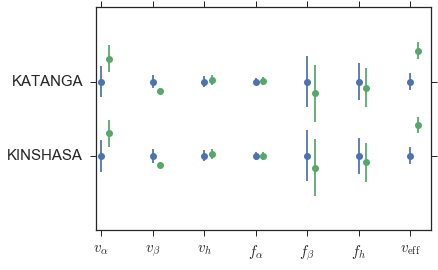

In [29]:
for i in range(nstate): #Right now, it replots the same data for both states. Change first '0' to 'i'.
    plt.errorbar(x,AD[0,:,0]/AD[0,:,0] + float(i),yerr=AD[0,:,1]/AD[0,:,0],fmt='bo')
    plt.errorbar(x+0.15,VCD[0,:,0]/AD[0,:,0]+ float(i),yerr=VCD[0,:,1]/VCD[0,:,0],fmt='go')
    #plt.errorbar(x+0.3,VSD[0,:,0]/AD[0,:,0]+float(i),yerr=VSD[0,:,1]/VSD[0,:,0],fmt='ro') #This plots the case plus
                                                                                           #serology data, and messes
                                                                                           #up the plot. We need to 
                                                                                           #find a different way to 
                                                                                            #show that.
    #plt.ylim(-2,2)
    
plt.xlim(0.9,7.4)
plt.ylim(0,3)
plt.xticks(x,params, fontsize=15)
plt.yticks(y,states, fontsize=15)